In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from PIL import Image
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [ ]:


def load_images_and_labels(folder_path, target_size=(224, 224)):
    X = []  # List to store resized image pixel values
    Y = []  # List to store corresponding labels

    label_encoder = LabelEncoder()

    # Iterate through each subdirectory (class label)
    for label_idx, label in enumerate(os.listdir(folder_path)):
        label_path = os.path.join(folder_path, label)
        if not os.path.isdir(label_path):
            continue  # Skip if it's not a directory

        # Iterate through images in the current subdirectory
        for filename in os.listdir(label_path):
            img_path = os.path.join(label_path, filename)

            try:
                # Load image and convert to RGB (if not already)
                img = Image.open(img_path).convert('RGB')

                # Resize image to target size
                img = img.resize(target_size)

                img_array = np.array(img)  # Convert PIL image to numpy array

                # Append resized image array to X and corresponding label to Y
                X.append(img_array)
                Y.append(label_idx)  # Append label index

            except Exception as e:
                print(f"Error loading image: {img_path}. Error: {e}")

    # Convert lists to numpy arrays
    X = np.array(X)
    Y = np.array(Y)

    # Fit LabelEncoder on Y
    label_encoder.fit(Y)

    # Convert Y to one-hot encoded vectors
    Y_one_hot = to_categorical(Y, num_classes=len(os.listdir(folder_path)))

    return X, Y_one_hot, label_encoder


In [ ]:
folder_path = '/content/drive/My Drive/cricketShotsData/data'


In [ ]:
X, Y, label_encoder = load_images_and_labels(folder_path)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_images(X, Y_one_hot, shot_dict):
    # Plot the first 5 images and their labels
    random_indices = np.random.choice(len(X), size=5, replace=False)

    # Plot the random images and their labels
    plt.figure(figsize=(15, 7))
    for i, idx in enumerate(random_indices):
        plt.subplot(1, 5, i + 1)
        plt.imshow(X[idx])
        label_index = np.argmax(Y_one_hot[idx])
        shot_label = shot_dict[str(label_index)]  # Get shot name from dictionary
        plt.title(shot_label)
        plt.axis('off')

    plt.show()


In [ ]:
shot_dict = {
    "0": "pull",
    "1": "flick",
    "2": "drive",
    "3": "sweep"
}

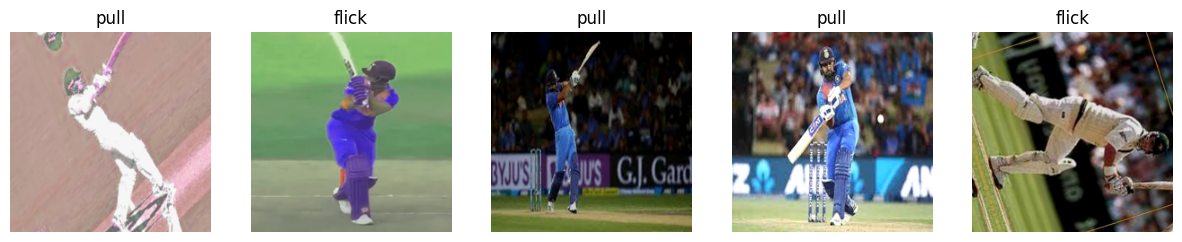

In [ ]:
plot_images(X, Y, shot_dict)

In [ ]:
X = X.astype('float32')
X /= 255

In [ ]:
X.min(), X.max()

(0.0, 1.0)

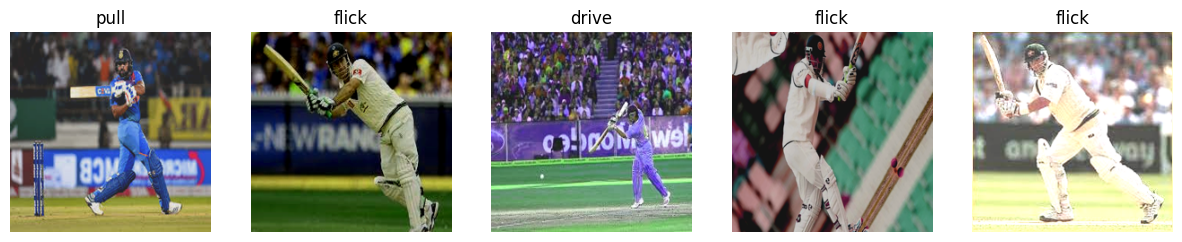

In [ ]:
plot_images(X, Y, shot_dict)

In [ ]:
X.shape, Y.shape

((4724, 224, 224, 3), (4724, 4))

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [ ]:
X_train.shape, Y_train.shape

((3543, 224, 224, 3), (3543, 4))

In [ ]:
X_test.shape, Y_test.shape

((1181, 224, 224, 3), (1181, 4))

In [ ]:
from tensorflow import keras

vgg = keras.applications.VGG16(
    include_top = False,
    weights = 'imagenet',
    input_shape = ((224, 224, 3))
)

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
vgg.layers

In [ ]:
from keras.layers import Dense, Flatten

d1 = Dense(4096, activation='relu')(Flatten()(vgg.layers[-1].output))
d2 = Dense(4096, activation='relu')(d1)
d3 = Dense(4, activation='softmax')(d2)

In [ ]:
from keras import Model

model = Model(inputs = vgg.inputs, outputs = d3)

In [ ]:
model.layers

In [ ]:
model.layers[-1].output_shape

(None, 4)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07), metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs = 2, batch_size = 32)

Epoch 1/2


KeyboardInterrupt: 

In [ ]:
model.evaluate(X_test, Y_test, batch_size = 32)

NameError: name 'model' is not defined

In [ ]:
test = X_test[0:5, :,:,:]

In [ ]:
predictions = model.predict(test)